In [1]:
### Carga de paquetes y librerias
#!pip install keras-tuner
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf #Framework para deep learning
from tensorflow import keras #API que contiene la mayoría de funciones para las RN

2024-05-22 19:38:54.908450: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
### Carga de datos fasion_mnist
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

### Estandarización de los datos
x_train2 = x_train/255 # Valores entre 0 y 1
x_test2 = x_test/255

In [6]:
## Definición de la arquitectura CNN
model_cnn = keras.models.Sequential()

# Definición de la primera capa convolucional
model_cnn.add(
    keras.layers.Conv2D(
        filters= 32,
        kernel_size= (3,3),
        strides= (2,2),
        activation= 'relu',
        input_shape=(28,28,1)
        )
)

# Definición de la capa de agrupación
model_cnn.add(
    keras.layers.MaxPooling2D(
        pool_size=(2,2),
        strides=(2,2)
    )
)

## La salida de la capa anterior es un tensor (vector) de 2D, Se debe convertir a 1D
# antes de pasar a las capas densas
model_cnn.add(
    keras.layers.Flatten()
)

## Adicion de las capas densas (totalmente conectadas) - Cabecera de clasificación
model_cnn.add(
    keras.layers.Dense(
        units=128,
        activation='relu'
    )
)

# Definición de capa de salida
model_cnn.add(
    keras.layers.Dense(
        units=10,
        activation='softmax'
    )
)

In [14]:
## Compilación del modelo
model_cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 13, 13, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 6, 32)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 128)               147584    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 149,194
Trainable params: 149,194
Non-trainable params: 0
________________________________________________

In [11]:
#%pip install pydot
keras.utils.plot_model(
    model_cnn,
    to_file='modelo_cnn1.png',
    show_shapes=True
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [15]:
## Entrenamiento de la Red Neuronal
history = model_cnn.fit(
    x_train2,
    y_train,
    epochs=3,
    #validation_data=(x_test2, y_test)
    validation_split=0.2
)

Epoch 1/3
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5170 - accuracy: 0.8159 - val_loss: 0.4032 - val_accuracy: 0.8589
Epoch 2/3
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3641 - accuracy: 0.8681 - val_loss: 0.3635 - val_accuracy: 0.8674
Epoch 3/3
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3215 - accuracy: 0.8826 - val_loss: 0.3376 - val_accuracy: 0.8792


In [18]:
## Evaluación de la red con dataset de test
from sklearn.metrics import classification_report
class_name= ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

y_hat = np.argmax(model_cnn.predict(x_test2), axis=1)

313/313 [==============================] - 1s 2ms/step


In [23]:
print(classification_report(y_test, y_hat, target_names=class_name))

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.79      0.82      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.82      0.78      0.80      1000
       Dress       0.87      0.91      0.89      1000
        Coat       0.84      0.69      0.76      1000
      Sandal       0.97      0.96      0.96      1000
       Shirt       0.58      0.72      0.64      1000
     Sneaker       0.95      0.92      0.94      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.92      0.96      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



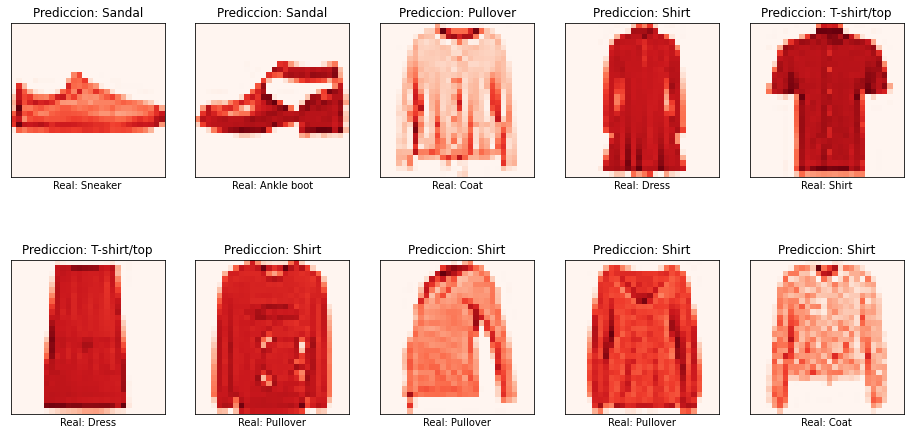

In [28]:
errors = np.nonzero(y_hat != y_test)[0]
# Visualizar las primeras 10 predicciones erroneas
plt.figure(figsize=(16, 8))
for i, incorrect in enumerate(errors[0:10]):
    plt.subplot(2,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[incorrect].reshape(28,28), cmap = 'Reds')
    plt.title("Prediccion: {}".format(class_name[y_hat[incorrect]]))
    plt.xlabel("Real: {}".format(class_name[y_test[incorrect]]))